# The Sparks Foundation - Data Science and Bussiness Analytics Internship

## Auther: Priyanka Shah

## Task 2: Prediction using Unsupervised Machine Learning Algorithm

Predict the optimal number of clusters and represent it visually.
From a given 'Iris' dataset, predict the optimal number of clusters and represent visually.

## Steps :


1.Importing required libraries read data
2.Determine the optiman number of clusters
3.Training the K-means model on the dataset
4.Visualizing the clusters

## Step 1:Importing Libraries and read data

In [1]:
#imporing libraries

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline 

# to ignore warning
import warnings as wg
wg.filterwarnings('ignore')

In [2]:
#read data

path='Downloads\Iris.csv'
dataset=pd.read_csv(path)
print("Data imported successfully")
dataset

Data imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
dataset.shape

(150, 6)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
dataset.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# dividing dataset of iris into independent and dependent features
#by selecting only SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm

X=dataset.iloc[:, [1,2,3,4]].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Step 2: Determine the optiman number of clusters using elbow method

The Elbow Method is methods to determine this optimal value of k.

Inertia:
It is the sum of squared distances of samples to their closest cluster center.    

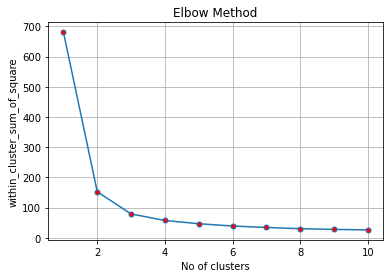

[680.8243999999996, 152.36870647733915, 78.94084142614601, 57.317873214285726, 46.56163015873017, 38.930963049671746, 34.190687924796634, 30.063874432733137, 27.84235606060608, 26.04820224804435]


In [8]:
# calculate within cluster sum of square

within_cluster_sum_of_square=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters = i, init= 'k-means++', random_state=0)
    kmeans.fit(X)
    within_cluster_sum_of_square.append(kmeans.inertia_)
    
# plotting within_cluster_sum_of_square vs no. of clusters
plt.plot(range(1,11),within_cluster_sum_of_square,marker='o',markerfacecolor='red',markersize=5)
plt.title("Elbow Method")    
plt.xlabel("No of clusters")
plt.ylabel("within_cluster_sum_of_square")
plt.grid()
plt.show()
print(within_cluster_sum_of_square)

here the bend(elbow) in 2D plot indicates the appropriate number of clusters.
so the number of cluster is 3.


## Step 3:  Training the K-means model on the dataset

In [9]:
kmeans=KMeans(n_clusters = 3, init= 'k-means++', random_state=0) # making 3 clusters
y_kmeans=kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## Step 4 :Visualizing the clusters

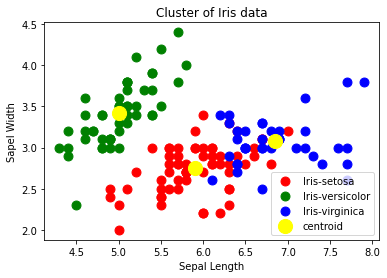

In [10]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1], s=80, c='red', label ='Iris-setosa')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1], s=80, c='green', label ='Iris-versicolor')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1], s=80, c='blue', label ='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200, c='yellow',label= 'centroid')
plt.title("Cluster of Iris data")
plt.xlabel('Sepal Length')
plt.ylabel('Sapel Width')
#plt.grid()
plt.legend()
plt.show()
